In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from preprocessamento import preprocessamento

csv_file = 'Datasets_csv/df_PUC.csv'
train, teste, val, _, _, _ = preprocessamento(csv_file, 0.6, 0.2, 0.2, True)

Found 600 validated image filenames.
Found 200 validated image filenames.
Found 200 validated image filenames.


In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

In [36]:
x_train, _ = next(train)
x_test, _ = next(teste)
x_val, _ = next(val)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)


In [38]:
def show_car_data(X, n=10, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(image.array_to_img(X[i]))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

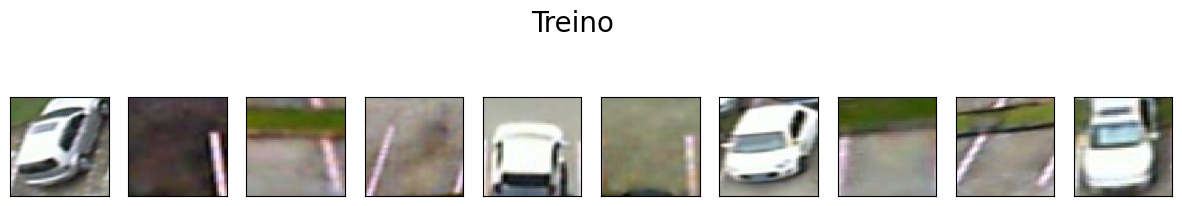

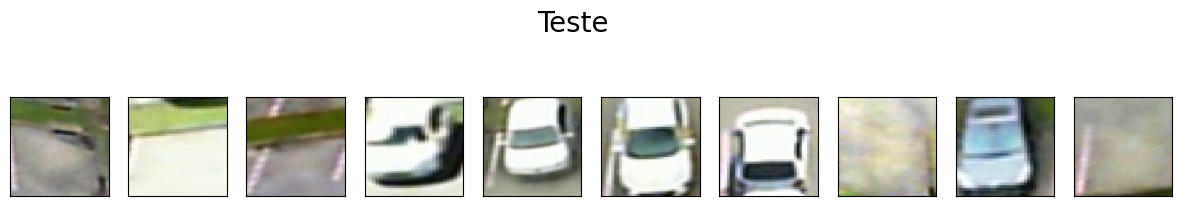

In [39]:
show_car_data(x_train, title="Treino")
show_car_data(x_test, title="Teste")

In [40]:
input_layer = Input(shape=(256, 256, 3), name="INPUT")
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

code_layer = MaxPooling2D((2, 2), name="CODE")(x)

x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(code_layer)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2DTranspose(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
output_layer = Conv2D(3, (3, 3), padding='same', name="OUTPUT")(x)

In [41]:
AE = Model(input_layer, output_layer)
AE.compile(optimizer='adam', loss='mse')
AE.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)              │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 8)    │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CODE (MaxPooling2D)             │ (None, 32, 32, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 32, 32, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 64, 64, 8)      │           584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 128, 128, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 128, 128, 16)   │         1,168 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 256, 256, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Conv2D)                 │ (None, 256, 256, 3)    │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
AE.fit(x_train, x_train,
                epochs=30,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 23175.7031 - val_loss: 25741.3457
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 586ms/step - loss: 23058.3438 - val_loss: 25233.2012
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step - loss: 22597.2031 - val_loss: 24373.9336
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step - loss: 21830.1758 - val_loss: 23053.1543
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - loss: 20651.9219 - val_loss: 21310.2109
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - loss: 19091.6934 - val_loss: 19130.8652
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step - loss: 17137.7148 - val_loss: 16452.2266
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - loss: 14736.8438 - val_loss: 13415.6875
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step - loss: 11981.8438 - val_loss: 9550.7510
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step - loss: 8536.0059 - val_loss: 6011.3477
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - loss: 5417.5020 - val_loss: 3979

In [43]:
AE.save("autoencoder.h5")


In [44]:
get_encoded = Model(inputs=AE.input, outputs=AE.get_layer("CODE").output)

In [45]:
encoded_cat = get_encoded.predict(x_test)
encoded_cat = encoded_cat.reshape((len(x_test), 32*32*8)) #ver na code layer 
encoded_cat.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


(32, 8192)

In [46]:
reconstructed = AE.predict(x_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step


In [53]:
def show_data(X, n=10, height=64, width=128, title=""):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

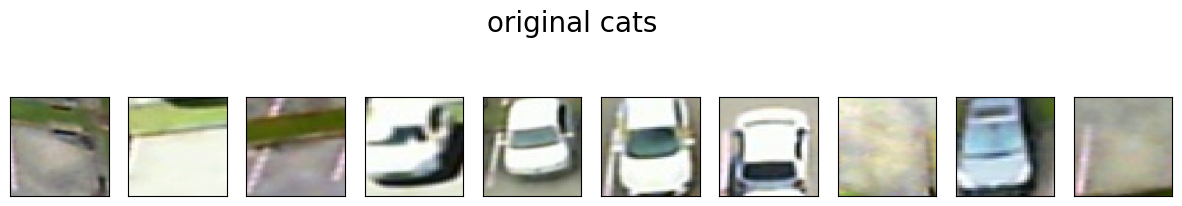

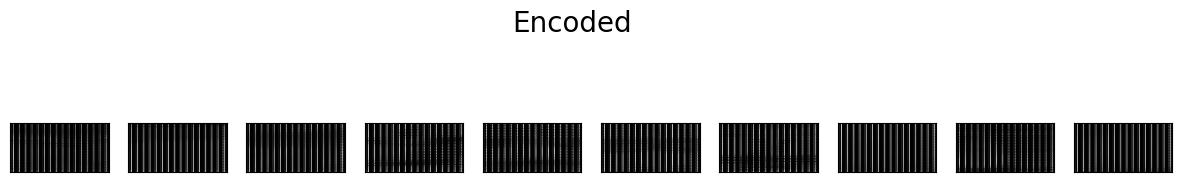

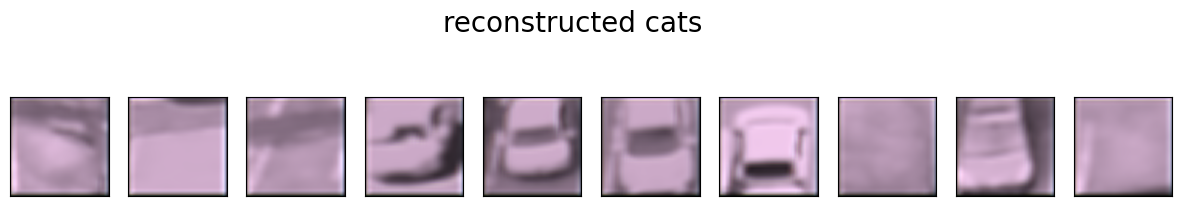

In [54]:
show_car_data(x_test, title="original cats")
show_data(encoded_cat, title="Encoded")
show_car_data(reconstructed, title="reconstructed cats")